In [1]:
# get all asian photos

# for each photo

# show photo

# get user input (S = south; E = east)

# depending on input, change race JSON to southasian or eastasian

# need to do this for Others as well

In [2]:
import os
import json
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

READ_FILE = 'out-race-Others.json'
IMG_DIRS = ["utkf/part{0}/".format(x) for x in range(1, 4)]

In [3]:
entries = []

with open(READ_FILE, 'r') as f:
    data = json.loads(f.read())
    for entry in data:
        imgName, imgData = entry[0], entry[1]
        entries.append((imgName, imgData))

[33/1711] utkf/part1/2_1_4_20161221202842353.jpg


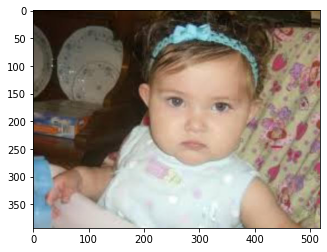

[H]ispanic/[L]atino, or [M]iddle Eastern? (or Q to exit, P to skip/junk)H
[35/1711] utkf/part1/1_0_4_20161221202654538.jpg


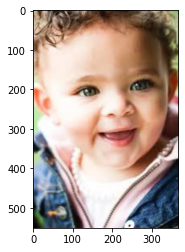

[H]ispanic/[L]atino, or [M]iddle Eastern? (or Q to exit, P to skip/junk)Q


In [8]:
def findDirFromImage(img):
    # return 'utkf/partx/image-name', where x ∈ [1, 2, 3]
    testPath = ["{0}{1}".format(IMG_DIRS[i], img) for i in range(0, 3)]
    foundPath = filter(lambda x: os.path.exists(x), testPath)
    res = list(foundPath)[0]
    return res

entriesA = []
entriesB = []
entriesJunk = []
entriesStr = str(entries)

try:
    with open("entriesA.json", 'r') as f:    
        entriesA = json.load(f)

    with open("entriesB.json", 'r') as f:    
        entriesB = json.load(f)
except:
    pass

running = True

while running:
    for i, entry in enumerate(entries):
        imgName, imgData = entry[0], entry[1]

        if running:
            if imgName in entriesStr: # ... yikes 

                if imgData['race'] == 'Others':

                    imgSubDir = findDirFromImage(imgName)
                    imgPath = os.path.join(os.path.abspath(os.getcwd()), imgSubDir)
                    print("[{0}/{1}] {2}".format(i + 1, len(entries), imgSubDir))
                    image = mpimg.imread(imgPath)
                    plt.imshow(image)
                    plt.show()

                    time.sleep(0.2)
                    correctEntry = False
                    while not correctEntry:
                        # label = input("[S]outh Asian, or [E]ast Asian? (or Q to exit, P to skip/junk)").lower()
                        label = input("[H]ispanic/[L]atino, or [M]iddle Eastern? (or Q to exit, P to skip/junk)").lower()

                        # if label == 's'
                        if label == 'm':
                            # imgData['race'] = 'South Asian' 
                            imgData['race'] = '[M]iddle Eastern' 
                            entriesA.append((imgName, imgData))
                            correctEntry = True

                        # if label == 'e'
                        if label == 'h' or label == 'l':
                            # imgData['race'] = 'East Asian'
                            imgData['race'] = 'Hispanic/Latino'
                            entriesB.append((imgName, imgData))
                            correctEntry = True

                        if label == 'p':
                            correctEntry = True
                        if label == 'q':
                            running = False
                            correctEntry = True
                            break
                

with open("entriesA.json", "w") as f:
    json.dump(entriesA, f)

with open("entriesB.json", "w") as f:
    json.dump(entriesB, f)